In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:/Users/LeeKwangWon/Desktop/Data/test.csv",encoding = "cp949", low_memory = False)
plt.rcParams['font.family'] = "Malgun Gothic"

In [21]:
#서울에 있는 데이터의 위도와 경도를 봅니다.
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(407376, 39)

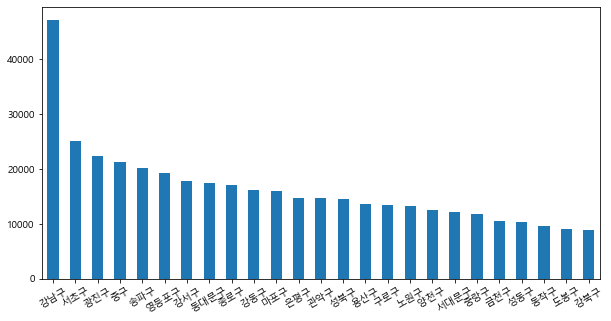

In [13]:
# 시군구명을 시각화하자.
df_seoul["시군구명"].value_counts().plot.bar(figsize = (10,5), rot = 30)

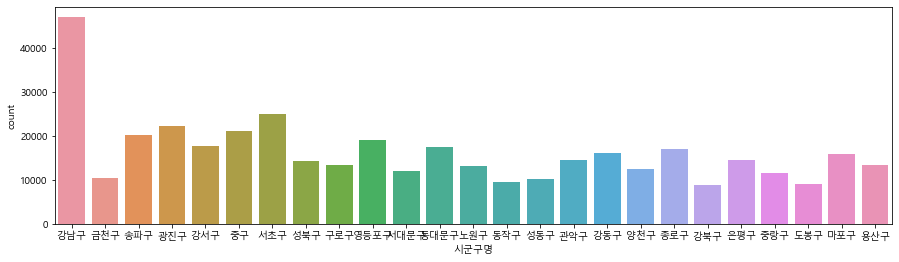

In [18]:
# 시군구명을 seaborn으로 출력.
plt.figure(figsize = (15,4))
sns.countplot(data = df_seoul, x="시군구명")

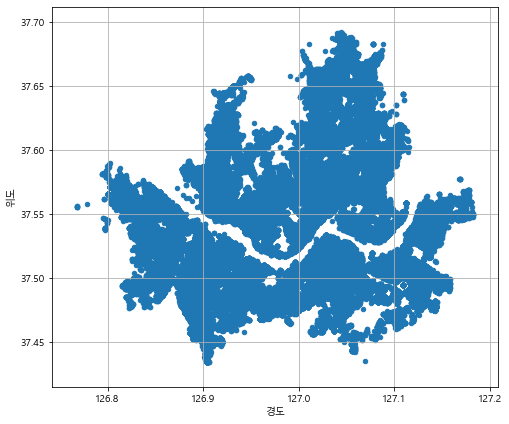

In [23]:
#Pandas의 plot.scatter를 통해 경도와 위도를 표시해 봅니다.
df_seoul[["경도","위도","시군구명"]].plot.scatter(x = "경도", y ="위도",figsize = (8,7), grid = True)



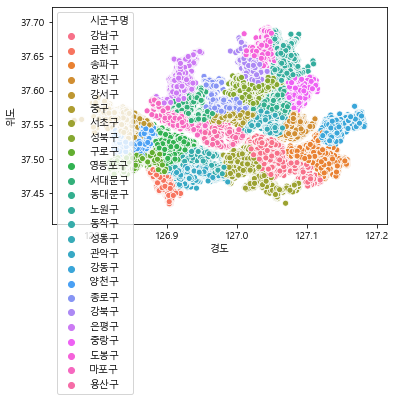

In [25]:
# seaborn의 scatterplot를 통해 구별 경도와 위도.
plt.figure(figsize = (9,8))
sns.scatterplot(data = df_seoul, x = "경도", y = "위도", hue = "시군구명")

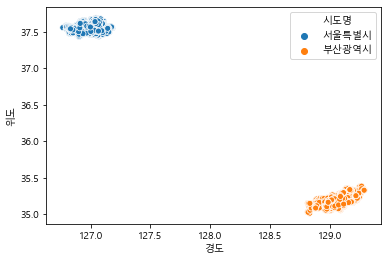

In [28]:
#seaborn의 scatterplot을 통해 전국데이터로 구별 경도와 위도를 표시해봅시다.
sns.scatterplot(data = df[:100000], x = "경도", y = "위도", hue = "시도명")

In [22]:
############################
#연습하기 --> 강동구 음식점 데이터
df_east = df_seoul[(df_seoul["시군구명"] == "강동구") & (df_seoul["상권업종대분류명"]=="음식")]

#결측치 처리 --> 결측치가 많은 컬럼 상위 10개를 제거합니다.
df_null = df_east.isnull().sum().reset_index()
df_null.columns = ["컬럼명","결측치수"]
top_null = df_null.sort_values(by="결측치수",ascending = False).head(10)
top_null_list = top_null["컬럼명"].tolist()

print(df_east.shape)
df_east = df_east.drop(top_null_list, axis = 1)
print(df_east.shape)


(5027, 39)
(5027, 29)


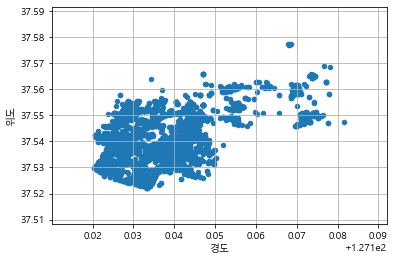

In [69]:
df_east[["경도","위도"]].plot.scatter(x= "경도", y="위도", grid = True)

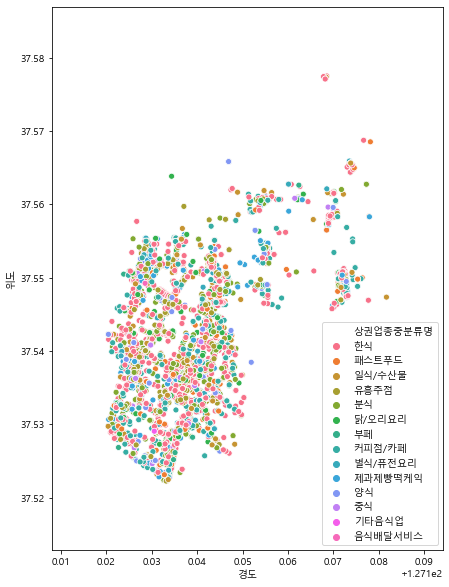

In [77]:
plt.figure(figsize = (7,10))
sns.scatterplot(data = df_east, x = "경도", y= "위도", hue="상권업종중분류명")

# Folium으로 위경도와 주소 데이터를 활용해 지도에 표현하기

In [1]:
import folium

In [11]:
folium.Map(location= [36.072,129.37621],
          tiels = 'Stamen Toner')

In [33]:
#이전에 다뤘던 서울 종합병원 데이터를 가지고 분석해보자.

df_seoul_hospital = df[(df["시도명"]=="서울특별시")& (df["상권업종소분류명"] == "종합병원")]
df_seoul_hospital = df_seoul_hospital.drop(top_null_list, axis = 1)
drop_row = df_seoul_hospital[
    df_seoul_hospital['상호명'].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row2 = df_seoul_hospital[
    df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()

print(df_seoul_hospital.shape)
drop_row = drop_row + drop_row2
df_seoul_hospital = df_seoul_hospital.drop(drop_row,axis=0)
print(df_seoul_hospital.shape)

df_seoul_hospital["경도"].mean()
df_seoul_hospital["위도"].mean()

(93, 29)
(60, 29)


In [53]:
map = folium.Map(location = [df_seoul_hospital["위도"].mean(), df_seoul_hospital["경도"].mean()],zoom_start = 15)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n,"상호명"]
    address = df_seoul_hospital.loc[n,"도로명주소"]
    popup = f"{name} - {address}"
    location = [df_seoul_hospital.loc[n,"위도"], df_seoul_hospital.loc[n,"경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map.save("a.html")
map